In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rc
import scienceplots
%config InlineBackend.figure_format = 'retina'
plt.style.use('science')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams.update({'font.size':16})

In [2]:
df = pd.read_csv('latex.csv')

In [3]:
df.iloc[[2, 4, 9, 49, 99, 9999]]

,Data Set 1: Current / A,Data Set 1: Uncertainty / A,Data Set 2: x/ m,Data Set 2: F / N,Data Set 2: Std F / N,Equations numbers,Data Set 3: time / s,Data Set 3: Position / m,Data Set 3: Std of position / m
2,6.535771e+07,2.726885e+06,0.082274,0.000330,0.000007,NaN,0.798225,6.131191,4.581773
4,6.895811e+07,2.972118e+06,0.148261,0.000272,0.000059,NaN,1.383543,14.678833,7.364869
9,6.788947e+07,3.156435e+06,0.313227,0.000179,0.000075,NaN,2.843550,48.913472,13.713726
49,6.669515e+07,2.638767e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,6.640581e+07,3.052551e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,6.837798e+07,2.653043e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
my_list = list(df.iloc[:, 1]/np.sqrt([el-1 for el in range(1, len(df.iloc[:, 1])+1)]))
indices = [2, 4, 9, 49, 99, 9999]
selected_elements = [my_list[i] for i in indices]
print(selected_elements)

[1928198.890721968, 1486058.845395849, 1052145.0731739674, 376966.75351536815, 306792.9060521552, 26531.753231632007]


In [5]:
df['Mean'] = np.array([np.mean(df.iloc[:, 0][:i]) for i in range(1, len(df.iloc[:, 0])+1)])
df['std_dev'] = np.array([np.std(df.iloc[:, 0][:i], ddof=1) for i in range(1, len(df.iloc[:, 0])+1)])
df['s_mean_M'] = df['std_dev']/np.sqrt(range(1, len(df['std_dev'])+1))
df['Power'] = df['Mean']**2*100
df['Power_unc'] = 2*df['Mean']*df['s_mean_M']*100
selected_elements = [list(df['Mean'])[i] for i in indices]
selected_elements1 = [list(df['std_dev'])[i] for i in indices]
selected_elements2 = [list(df['s_mean_M'])[i] for i in indices]
print(selected_elements)
print(selected_elements1)
print(selected_elements2)
print('Power =', np.array(df['Power'])[-1], 'Uncertainty =', np.array(df['Power_unc'])[-1])

[68499203.62255383, 69245933.35325542, 68499292.09726502, 69671069.9569687, 69623051.5999238, 69684620.62643835]
[4090558.4089175146, 3225361.1354685323, 2753835.291815113, 2483359.2532440247, 2455753.4492920213, 2632263.3546423926]
[2361684.9985244144, 1442425.3501787093, 870839.1823090201, 351200.03361824213, 245575.34492920214, 26322.633546423927]
Power = 4.855946351850637e+17 Uncertainty = 366856546514262.2


In [6]:
df['Weight'] = 1/(df.iloc[:, 1])**2
df['Weighted mean'] = (df.iloc[:, 0] * df['Weight']).cumsum() / df['Weight'].cumsum()
df['s_mean'] = 1/np.sqrt(df['Weight'].cumsum())
selected_elements = [list(df['Weighted mean'])[i] for i in indices]
selected_elements2 = [list(df['s_mean'])[i] for i in indices]
print(selected_elements)
print(selected_elements2)

[68305384.962365, 69089346.57457435, 68399519.20517571, 69664197.46470001, 69607988.07841423, 69686358.2035705]
[1662071.7427743478, 1305831.534535124, 933387.0861585095, 410217.69168716436, 290549.9666970346, 28825.927870332634]


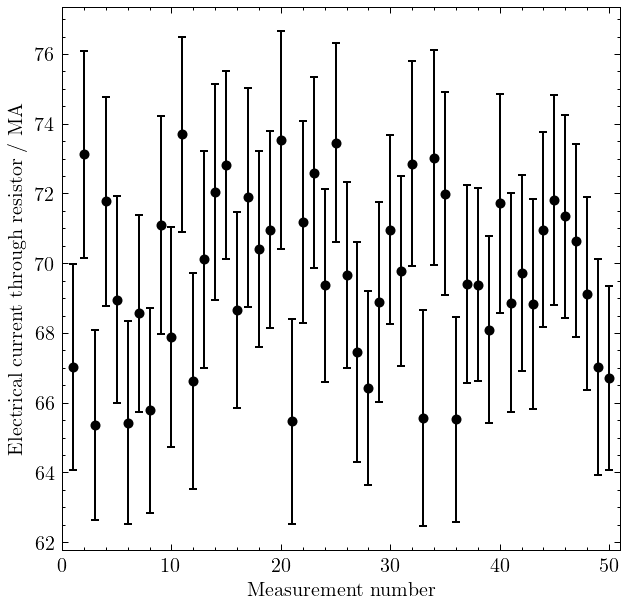

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(range(1, 51), df.iloc[:, 0][:50]*1e-6, color='black', s=16)
ax.errorbar(range(1, 51), df.iloc[:, 0][:50]*1e-6, yerr=df.iloc[:, 1][:50]*1e-6, linestyle='none', capsize=2, color='black')
ax.set_xlabel('Measurement number')
ax.set_ylabel('Electrical current through resistor / MA')
ax.set_xlim([0, 51])

plt.show()

In [8]:
data = df.iloc[:, 0]

# Calculate the mean
mean = np.mean(data)

# Calculate the standard deviation
std_dev = np.std(data, ddof=1)

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print(mean**2*100, 2*mean*100*std_dev)

Mean: 69684620.62643835
Standard Deviation: 2632263.3546423926
4.855946351850637e+17 3.6685654651426216e+16


-48.511681964491615 0.7627233721383048 348.1919473617713 5.80970177626916


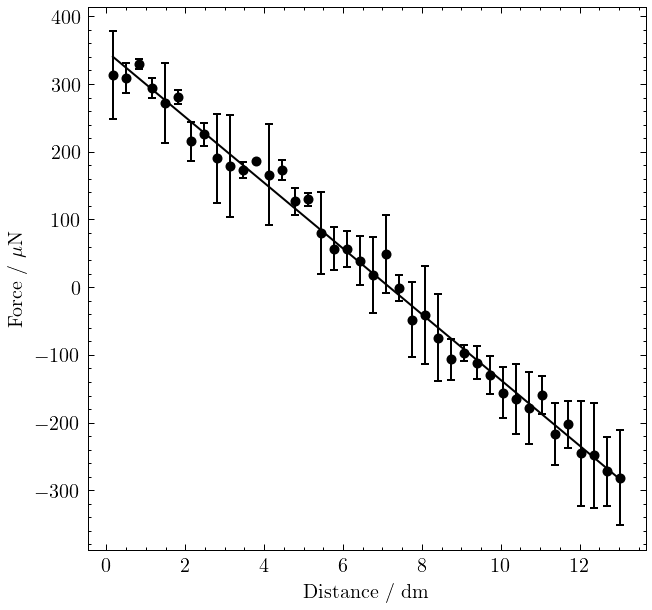

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.iloc[:, 2][:50]*10, df.iloc[:, 3][:50]*1e6, color='black', s=16)
ax.errorbar(df.iloc[:, 2][:50]*10, df.iloc[:, 3][:50]*1e6, yerr=df.iloc[:, 4][:50]*1e6, linestyle='none', capsize=2, color='black')
ax.set_xlabel('Distance / dm')
ax.set_ylabel('Force / $\mu$N')

def line(x, m, k):
    return m*x+k

is_valid = np.isfinite(df.iloc[:, 3])
clean_ydata = (df.iloc[:, 3])[is_valid]*1e6
clean_xdata = (df.iloc[:, 2])[is_valid]*10
popt, cov = curve_fit(line, clean_xdata, clean_ydata)
m = popt[0]
m_err = np.sqrt(float(cov[0][0]))
k = popt[1]
k_err = np.sqrt(float(cov[1][1]))
ax.plot(clean_xdata, m*clean_xdata+k, color='black')

print(m, m_err, k, k_err)
plt.show()

In [10]:
def linear_x_intercept(m, b):
    if m == 0:
        return None  # The line is parallel to the x-axis, no x-intercept
    x_intercept = -b / m
    return x_intercept

print(linear_x_intercept(m, k))
print(np.sqrt(abs(k_err/m)**2 + abs(k/m**2*m_err)**2))

7.1774866024359305
0.1645503017559068


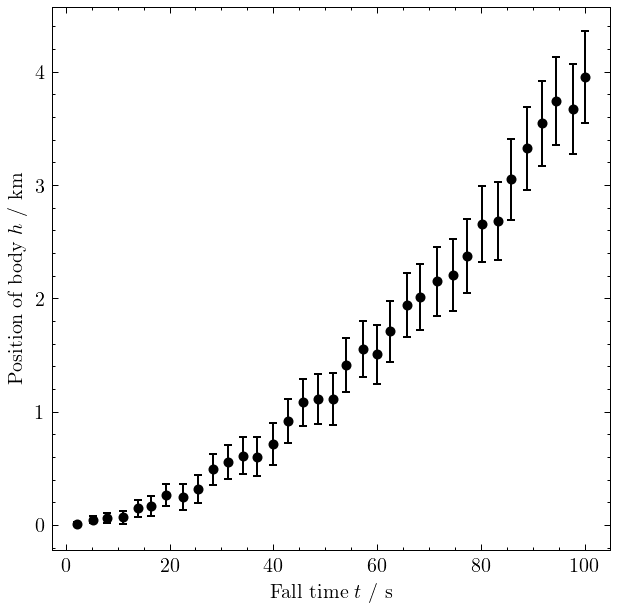

In [11]:
valid_times = (df.iloc[:, 6][:50])[np.isfinite(df.iloc[:, 6][:50])]/0.1
valid_distances = (df.iloc[:, 7][:50]*1e-3)[np.isfinite(df.iloc[:, 7][:50]*1e-3)]/0.1

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(valid_times, valid_distances, color='black', s=16)
ax.errorbar(valid_times, valid_distances, yerr=(df.iloc[:, 8][:50]*1e-3)[np.isfinite(df.iloc[:, 8][:50]*1e-3)]/0.1, linestyle='none', capsize=2, color='black')
ax.set_xlabel('Fall time $t$ / s')
ax.set_ylabel('Position of body $h$ / km')

plt.show()

1.7155492113126567 0.027191537295717393


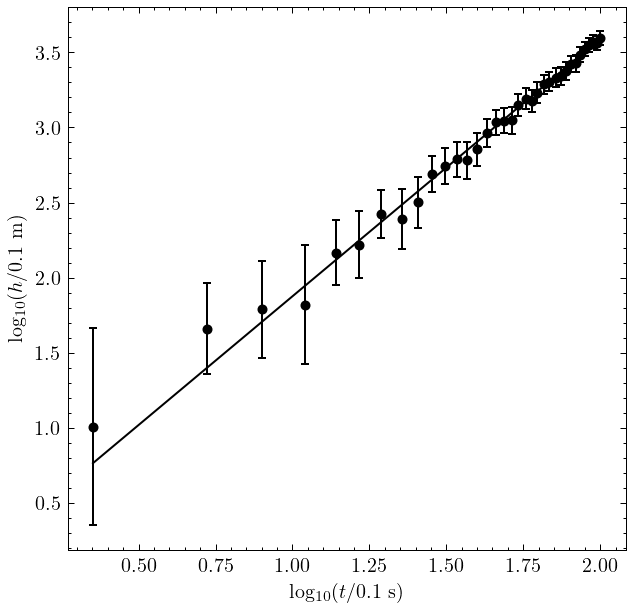

In [12]:
valid_times_log = np.log10((df.iloc[:, 6])[np.isfinite(df.iloc[:, 6])]/0.1)
valid_distances_log = np.log10((df.iloc[:, 7])[np.isfinite(df.iloc[:, 7])]/0.1)
valid_distances_log_err = 1/(np.log(10)*(df.iloc[:, 7])[np.isfinite(df.iloc[:, 7])])*(df.iloc[:, 8])[np.isfinite(df.iloc[:, 8])]
valid_distances = (df.iloc[:, 7][:50])[np.isfinite(df.iloc[:, 7][:50])]/0.1

popt, cov = curve_fit(line, valid_times_log, valid_distances_log, sigma=valid_distances_log_err)
m = popt[0]
m_err = np.sqrt(float(cov[0][0]))
k = popt[1]
k_err = np.sqrt(float(cov[1][1]))

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(valid_times_log[:50], valid_distances_log[:50], color='black', s=16)
ax.errorbar(valid_times_log[:50], valid_distances_log[:50], yerr=valid_distances_log_err, linestyle='none', capsize=2, color='black')
ax.plot(valid_times_log, m*valid_times_log+k, color='black')
ax.set_xlabel('log$_{10}$($t$/0.1 s)')
ax.set_ylabel('log$_{10}$($h$/0.1 m)')
print(m, m_err)

plt.show()